In [0]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as ss

This notebook gathers all of the left and right error for each spectral type and then puts them all onto one figure with a shift between each type to show how they compare. 

In [0]:
%matplotlib inline

In [3]:
intHK=np.array([-0.1,-0.09,-0.09,-0.09,-0.09,-0.08,-0.09,-0.06,-0.07,-0.05,-0.06,-0.05,-0.05,-0.03,0,0.0025,0.005,0.0083,
            0.0117,0.015,0.02,0.025,0.0267,0.0283,0.03,0.0325,0.035,0.0367,0.0383,0.04,0.0425,0.045,0.0467,0.0483,
            0.05,0.051,0.052,0.0535,0.055,0.0575,0.06,0.06375,0.0675,0.07125,0.075,0.0825,0.09,0.0975,0.105,0.11,0.12,
            0.13,0.14217,0.1533,0.165,0.2,0.21,0.25,0.275,0.32,0.37])

intJH=np.array([-0.065,-0.065,-0.075,-0.095,-0.095,-0.075,-0.025,-0.045,-0.035,-0.045,-0.025,-0.025,-0.005,0.005,0,0.01,
            0.02,0.033,0.0467,0.06,0.075,0.09,0.103,0.117,0.13,0.1475,0.165,0.187,0.208,0.23,0.258,0.285,0.292,0.298,
            0.305,0.3125,0.32,0.325,0.33,0.35,0.37,0.39,0.41,0.43,0.45,0.475,0.5,0.54,0.58,0.61,0.635,0.66,0.6717,
            0.683,0.695,0.68,0.665,0.62,0.6,0.62,0.6])

SpType=np.array(['O6V','O7V','O8V','O9V','B0V','B1V','B2V','B3V','B4V','B5V','B6V','B7V','B8V','B9V',
            'A0V','A1V','A2V','A3V','A4V','A5V','A6V','A7V','A8V','A9V',
            'F0V','F1V','F2V','F3V','F4V','F5V','F6V','F7V','F8V','F9V',
            'G0V','G1V','G2V','G3V','G4V','G5V','G6V','G7V','G8V','G9V',
            'K0V','K1V','K2V','K3V','K4V','K5V','K6V','K7V','K8V','K9V',
            'M0V','M1V','M2V','M3V','M4V','M5V','M6V'])

x=np.arange(intHK.size)

len(SpType)

61

In [0]:
def prob_bins(x,meanbin,stdbin):
    # Create the probability distribution:
    lowedge, highedge = np.arange(len(x))-0.5,np.arange(len(x))+0.5 # put items at bin centers
    prob_bins = ss.norm.cdf(highedge, loc=meanbin, 
                            scale = stdbin)-ss.norm.cdf(lowedge, loc=meanbin, scale = stdbin)
    prob_bins = prob_bins / prob_bins.sum() # normalize the probabilities so their sum is 1

    return prob_bins

In [5]:
RMSLESS=np.zeros((61,10))          #Making arrays to hold all the information for left and right for all the spectral types. 
RMSMORE=np.zeros((61,10))


los=np.arange(0.1,1.1,0.1)  #steps of los to take
sptypes = np.arange(0,61,1)  #number of spectral types

print(sptypes, los)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60]), array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))


In [6]:
#now to make a function that will put the left and right side of each spectral type into my 2d array


for k in sptypes:  #going through each spectral type and assigning it to meanbin 
  meanbin = k
  stdbin = 2
  for stdbins in [1,2,4]:
    # Sample the probability distribution:
    prob = prob_bins(x,meanbin,stdbins) # customize the probability distribution
    nums = np.random.choice(x, size = 100000, p = prob) # a set of chosen bin indices
    
  for i in range(0,9,1):       #changing the losEHK from 0.1 to 1 
    losR=1.6
    losEHK=los[i]         #this goes from 0.1 to 1 in incriments of 0.1
    losEJH=losR*losEHK

    # Calculate the error-free photometry, all spectral types
    simJH=losEJH+intJH
    simHK=losEHK+intHK
  
  
    # Sample the probability distribution:
    # customize the probability distribution
    prob = prob_bins(x,meanbin,stdbins) 
    # randomly choose a set of bin indices based on that probability
    nums = np.random.choice(x, size = 100000, p = prob) 

    R=(simJH[meanbin]-intJH[nums])/(simHK[meanbin]-intHK[nums])

  
    RMSl=np.sqrt(np.mean((R[R<1.6]-1.6)**2))  #RMS_R <1.6
    RMSg=np.sqrt(np.mean((R[R>1.6]-1.6)**2))  #RMS_R >1.6

    RMSLESS[k][i]=RMSl   #RMS less than 1.6 array for spectral type l position i
    RMSMORE[k][i]=RMSg  #RMS greater than 1.6 array for spectral type l position i 
    
  print("Spectral type is ",SpType[meanbin], 'meanbin is',meanbin)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in divide


('Spectral type is ', 'O6V', 'meanbin is', 0)
('Spectral type is ', 'O7V', 'meanbin is', 1)
('Spectral type is ', 'O8V', 'meanbin is', 2)
('Spectral type is ', 'O9V', 'meanbin is', 3)
('Spectral type is ', 'B0V', 'meanbin is', 4)
('Spectral type is ', 'B1V', 'meanbin is', 5)


/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


('Spectral type is ', 'B2V', 'meanbin is', 6)
('Spectral type is ', 'B3V', 'meanbin is', 7)
('Spectral type is ', 'B4V', 'meanbin is', 8)
('Spectral type is ', 'B5V', 'meanbin is', 9)
('Spectral type is ', 'B6V', 'meanbin is', 10)
('Spectral type is ', 'B7V', 'meanbin is', 11)
('Spectral type is ', 'B8V', 'meanbin is', 12)
('Spectral type is ', 'B9V', 'meanbin is', 13)
('Spectral type is ', 'A0V', 'meanbin is', 14)
('Spectral type is ', 'A1V', 'meanbin is', 15)
('Spectral type is ', 'A2V', 'meanbin is', 16)
('Spectral type is ', 'A3V', 'meanbin is', 17)
('Spectral type is ', 'A4V', 'meanbin is', 18)
('Spectral type is ', 'A5V', 'meanbin is', 19)
('Spectral type is ', 'A6V', 'meanbin is', 20)
('Spectral type is ', 'A7V', 'meanbin is', 21)
('Spectral type is ', 'A8V', 'meanbin is', 22)
('Spectral type is ', 'A9V', 'meanbin is', 23)
('Spectral type is ', 'F0V', 'meanbin is', 24)
('Spectral type is ', 'F1V', 'meanbin is', 25)
('Spectral type is ', 'F2V', 'meanbin is', 26)
('Spectral type i

Now to make one massive plot 

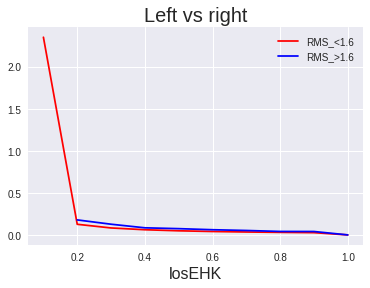

In [10]:
# first lets see if we can just plot one spectral types left error vs right error 

plt.subplot(1,1,1)
plt.plot(los,RMSLESS[0],'r', label='RMS_<1.6')
plt.plot(los, RMSMORE[0],'b',label='RMS_>1.6')          #plot of delta sigma and sigma on the same axies
plt.title('Left vs right', fontsize=20)
plt.xlabel('losEHK',fontsize=16)
plt.legend(loc='best')
plt.show()

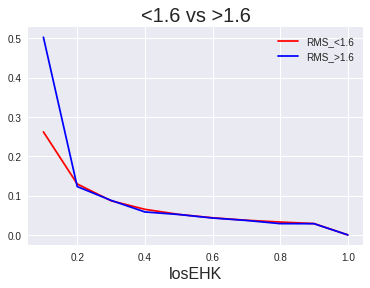

In [11]:
plt.subplot(1,1,1)                                    # looking at the plot of the next spectral type
plt.plot(los,RMSLESS[1],'r', label='RMS_<1.6')
plt.plot(los, RMSMORE[1],'b',label='RMS_>1.6') 
plt.title('<1.6 vs >1.6', fontsize=20)
plt.xlabel('losEHK',fontsize=16)
plt.legend(loc='best')
plt.show()

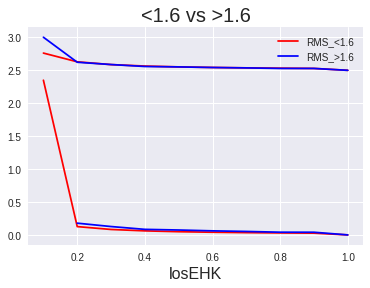

In [12]:
plt.subplot(1,1,1)               #Plot these two together but stacked. 
plt.plot(los,RMSLESS[0],'r')
plt.plot(los, RMSMORE[0],'b')  
plt.plot(los,RMSLESS[1]+2.5,'r', label='RMS_<1.6')           # the 2.5 determines how much of a shift should be between the two
plt.plot(los, RMSMORE[1]+2.5,'b',label='RMS_>1.6') 
plt.title('<1.6 vs >1.6', fontsize=20)
plt.xlabel('losEHK',fontsize=16)
plt.legend(loc='best')
plt.show()

Something weird happened when I put all of the plots on one image and that was because two of the plots went weird. Meanbin 5 (spectral type B1V) and 49 (spectral type K4V) both had RMS>1.6 values that went up to e14 which ended up throwing off the whole thing. Below I have printed those two plots for reference. Below that is a figure including all the other spectral types without those two, each having a shift associated with them.

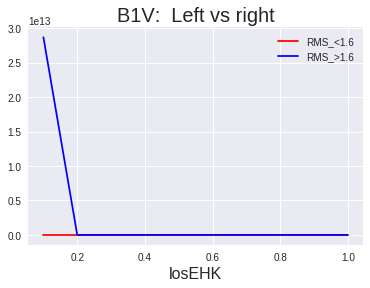

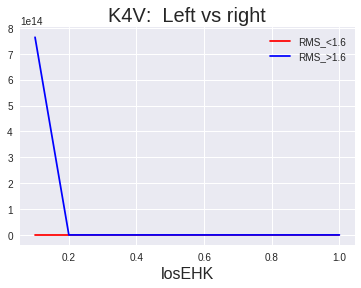

In [14]:
plt.subplot(1,1,1)
plt.plot(los,RMSLESS[5],'r', label='RMS_<1.6')
plt.plot(los, RMSMORE[5],'b',label='RMS_>1.6')          #plot of delta sigma and sigma on the same axies
plt.title('B1V:  Left vs right', fontsize=20)
plt.xlabel('losEHK',fontsize=16)
plt.legend(loc='best')
plt.show()

plt.subplot(1,1,1)
plt.plot(los,RMSLESS[49],'r', label='RMS_<1.6')
plt.plot(los, RMSMORE[49],'b',label='RMS_>1.6')          #plot of delta sigma and sigma on the same axies
plt.title('K4V:  Left vs right', fontsize=20)
plt.xlabel('losEHK',fontsize=16)
plt.legend(loc='best')
plt.show()

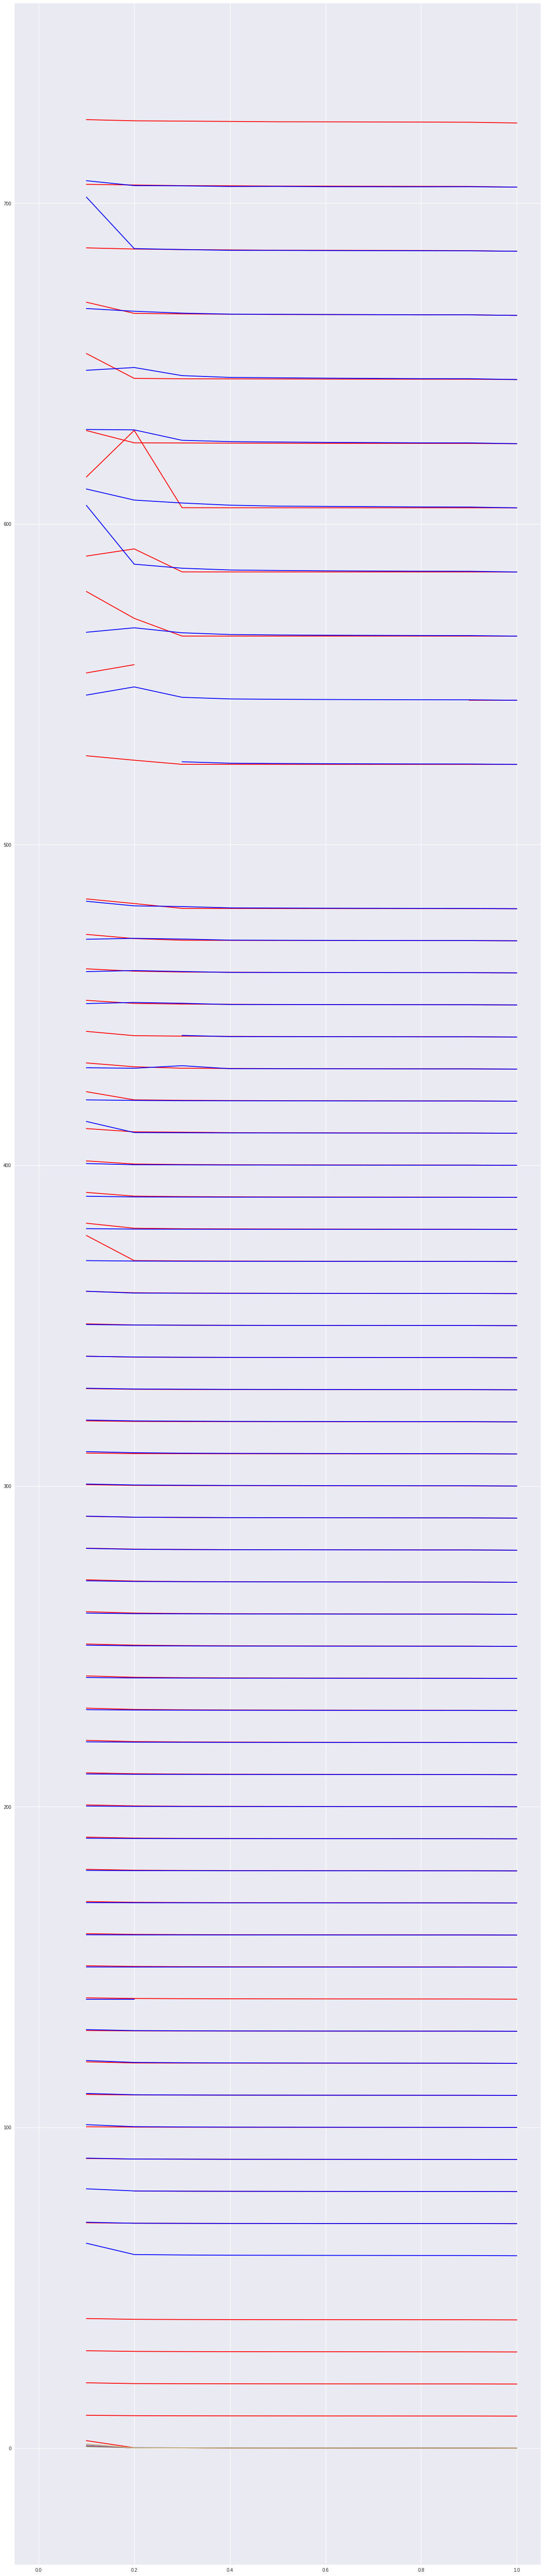

In [39]:
plt.figure(figsize=(20,100))

for k in range(0,5):
  plt.subplot(1,1,1)
  plt.plot(los,RMSLESS[k]+(10*k),'r',label='RMS_<1.6')        
  plt.plot(los,RMSMORE[k],+(10*k),'b',label='RMS_>1.6')

  
for k in range(6,49):
  plt.subplot(1,1,1)
  plt.plot(los,RMSLESS[k]+(10*k),'r')
  plt.plot(los,RMSMORE[k]+(10*k),'b')

  
for k in range(50,61):               #Spectral type in this range all have bigger error values and the lines cross over eachother so I spaced the out more
  plt.subplot(1,1,1)
  plt.plot(los,RMSLESS[k]+(20*k)-475,'r')
  plt.plot(los,RMSMORE[k]+(20*k)-475,'b')

  

plt.show()

If we change the shape of the image a bit when can zoom in on the difference better on the first few at the bottom. 

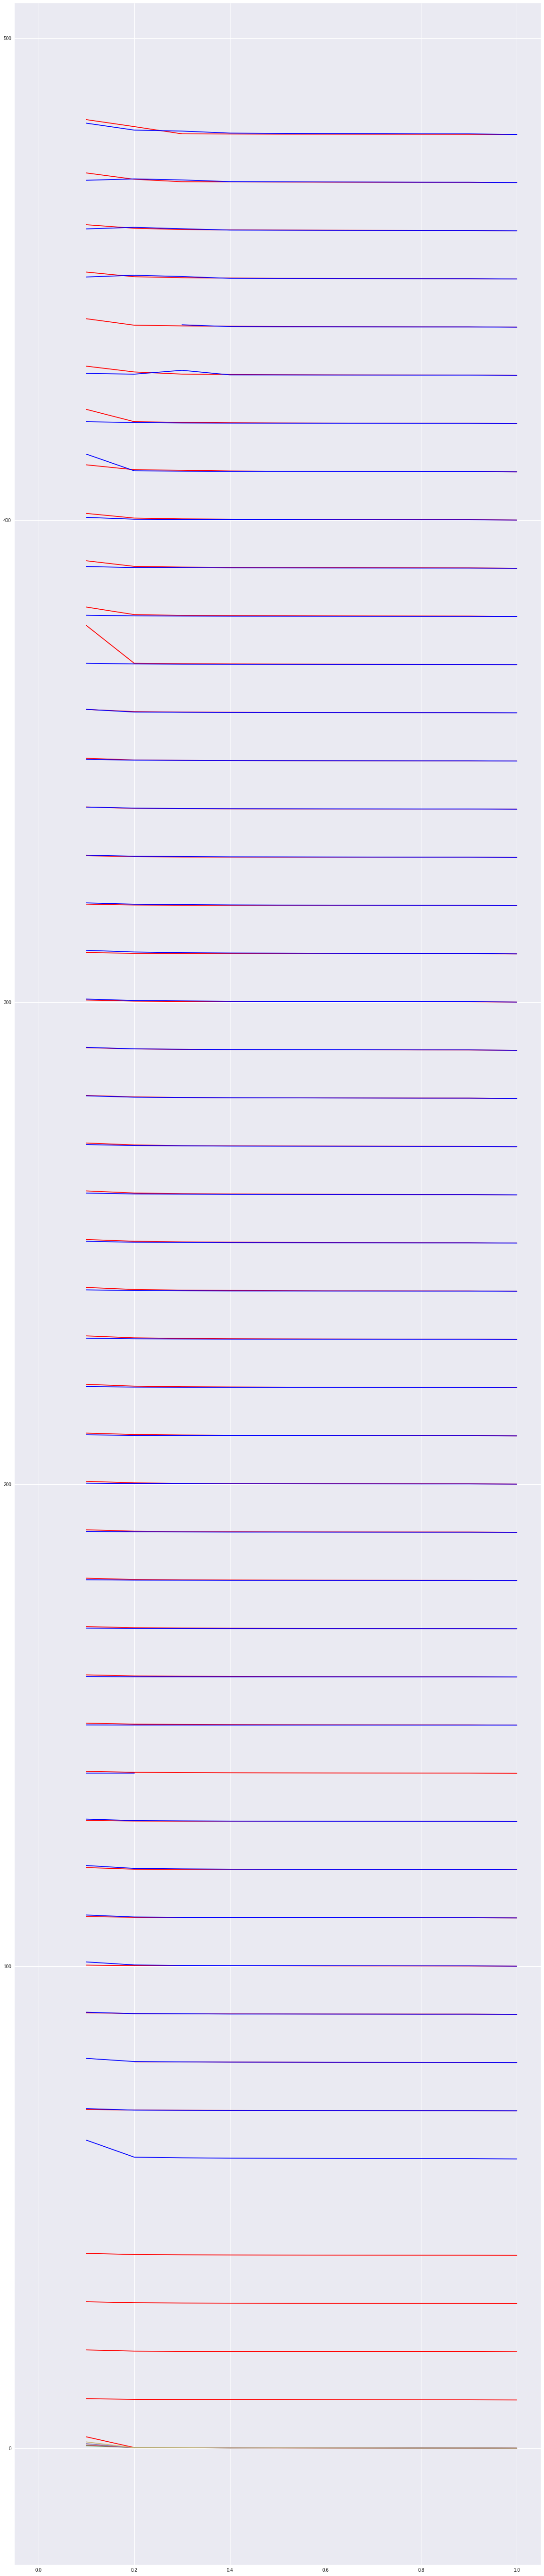

In [40]:
plt.figure(figsize=(20,100))

for k in range(0,5):
  plt.subplot(1,1,1)
  plt.plot(los,RMSLESS[k]+(10*k),'r',label='RMS_<1.6')        
  plt.plot(los,RMSMORE[k],+(10*k),'b',label='RMS_>1.6')

  
for k in range(6,49):
  plt.subplot(1,1,1)
  plt.plot(los,RMSLESS[k]+(10*k),'r')
  plt.plot(los,RMSMORE[k]+(10*k),'b')
  
plt.show()